# Forecast Daily EUR/USD Return using GARCH (1,1) Model

Knowing the future path helps FX quant traders in decision taking. We forecast teh evolution of EUR/USD using a GARCH (1,1) model.

## Basic FX Trading Strategy using GARCH

The strategy is carried out on a rolling basis. The GARCH parameters are estimated based on previous k days EUR/USD daily returns. So k days are used as a window to estimate GARCH parameters.

**Goal = To forecast next day (t + 1) return value.**



\begin{equation}
  \text{If Predicted EUR/USD} =\begin{cases}
    > 1, & \text{EUR is expected to appreciate against USD -> Buy EUR & Sell USD}.\\
    < 1, & \text{EUR is expected to depreciate against USD -> Sell EUR & Buy USD}.\\
    = 1, & \text{The algorithm does not trade}.
  \end{cases}
\end{equation}

\begin{equation}
  \text{If the value of k previous days} =\begin{cases}
    Too High, & \text{There could be structural breaks in the data not correctly captured by the parameters}.\\
    Too Low, & \text{The algorithm cannot estimate GARCH parameters}.
  \end{cases}
\end{equation}

However, the algorithms may not converge in certain cases and may just take a guess.

Improvements to the Algorithm can be done by introducing signals generated by:
1. Technical Indicators (MA, Bollinger bands, etc.)
2. Text Mining 
3. Different GARCH Models
4. Macroeconomic Indicators
5. Other algorithms or models (different values for k can be introduced in the model).

## Forecast FX Rates using GARCH 

**Asset:** EUR/USD daily return

**Period:** January 17, 2018 - January 17, 2019

**Source:** FRED Database http://fred.stlouisfed.org/series/DEXUSEU

**Null Values:** Removed from the analysis


In [4]:
fx<-c(1.000736,
1.000000,
0.999346,
1.003843,
1.009204,
1.007910,
0.994715,
0.994365,
1.003076,
1.003067,
1.004345,
0.997116,
0.997750,
0.997020,
0.991923,
0.996499,
0.999019,
1.003354,
1.007826,
1.002669,
1.006938,
0.996795,
0.992445,
0.997247,
1.000975,
0.997728,
0.999837,
0.995364,
0.997712,
1.000409,
1.008022,
1.001299,
1.006894,
0.998550,
0.993305,
1.000975,
0.999351,
1.006495,
0.997096,
0.996683,
0.996672,
1.003990,
0.995296,
0.999756,
1.003424,
1.004062,
1.006472,
0.997588,
0.995246,
0.995628,
1.001870,
0.997403,
0.997803,
1.002528,
0.994956,
1.003598,
1.003748,
1.001461,
1.003728,
0.994832,
1.000162,
1.004139,
0.997737,
1.002835,
0.996446,
0.995623,
0.994626,
1.000819,
0.996074,
0.994663,
0.999587,
0.997192,
0.993871,
0.997333,
1.000167,
0.997995,
0.998410,
0.994634,
0.999073,
1.003712,
1.004623,
1.002092,
0.990648,
0.993594,
1.000848,
0.998051,
0.999406,
1.001275,
0.992362,
1.003079,
0.994629,
0.990142,
1.009783,
1.000514,
1.000771,
1.001456,
0.997948,
1.009082,
1.003141,
0.996445,
1.002463,
0.999153,
0.999322,
0.987271,
0.998453,
0.999139,
0.997501,
1.001296,
1.000690,
1.002586,
1.005503,
0.998375,
0.992548,
0.999482,
1.008202,
0.993748,
1.004223,
1.003776,
1.003505,
1.000511,
0.998638,
0.999488,
0.997441,
0.997862,
1.003686,
0.996072,
0.998371,
0.996479,
1.008962,
0.999488,
0.998462,
0.999401,
0.998030,
1.000515,
1.004974,
0.998976,
0.996583,
0.995371,
0.998708,
0.997154,
1.002854,
1.000086,
0.997241,
0.985561,
0.999737,
0.996051,
0.998326,
1.004942,
1.001932,
1.002454,
1.008393,
1.005289,
0.997585,
1.005014,
1.004387,
1.003768,
0.998208,
0.995470,
0.995707,
0.997413,
1.004669,
1.000344,
0.995526,
1.002765,
0.998880,
1.003020,
1.003957,
0.998629,
1.002660,
1.000513,
0.999316,
1.005049,
0.999574,
1.002896,
0.999745,
0.998980,
0.992516,
0.995887,
0.995268,
0.999395,
0.996972,
0.998525,
0.999479,
0.998261,
1.005138,
1.002080,
0.999481,
1.003028,
0.999914,
0.995428,
0.996014,
1.001653,
0.996005,
1.001134,
0.992073,
0.998683,
1.001231,
1.000176,
0.997717,
0.997184,
1.005648,
0.998420,
1.001406,
1.001580,
1.004118,
0.996247,
0.992029,
0.996733,
1.002126,
1.001061,
1.006888,
1.004034,
0.995021,
1.000176,
0.994646,
1.000353,
0.995148,
1.000443,
1.008506,
0.994816,
1.002914,
0.999031,
1.002556,
1.001407,
0.998068,
0.995250,
1.004243,
0.999648,
0.994893,
1.003451,
1.002205,
1.005104,
1.000876,
0.997376,
1.000526,
1.000351,
1.002892,
1.000961,
0.991358,
1.003698,
1.000965,
1.005083,
0.997907,
1.006991,
0.999393,
0.996701,
0.992421,
1.001404,
0.998072)



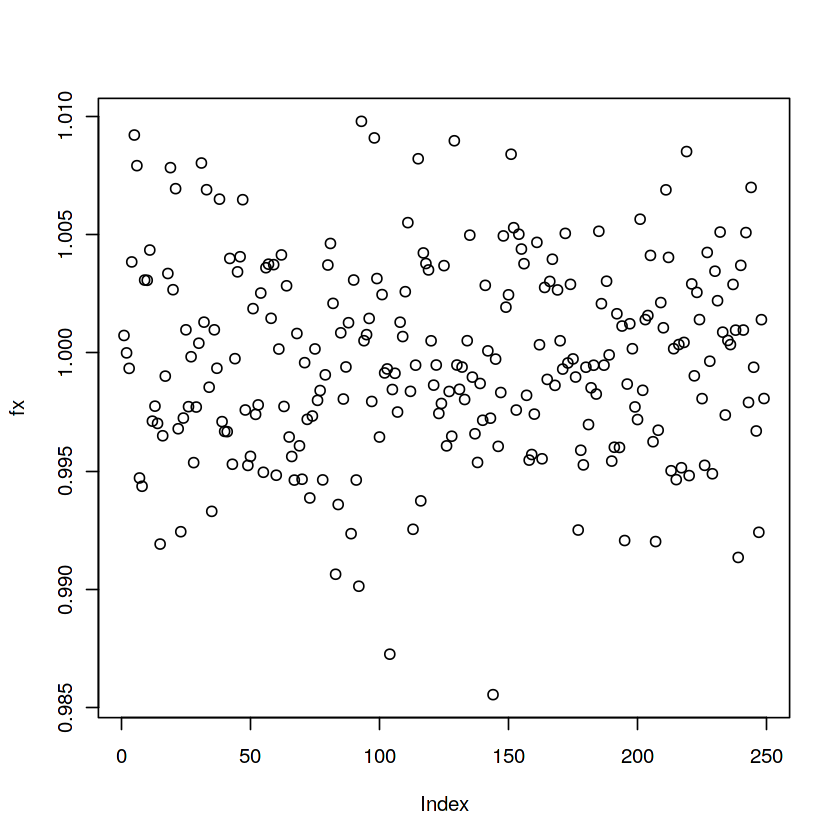

In [5]:
library("rugarch")
plot(fx)

In [6]:
# Specify GARCH (1,1) model using ugarchspec function
# garchOrder = c(1,1)
# mean model should be white noise --> armaOrder = c(0,0)

garch11_spec <-ugarchspec(variance.model = list(garchOrder=c(1,1)), 
                         mean.model = list(armaOrder = c(0,0)))

# Estimate GARCH model
garch11_fit <- ugarchfit(spec = garch11_spec, data = fx)

# Forecast FX
garch11_forecast <- ugarchforecast(garch11_fit, nahead=15)
garch11_forecast


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=1970-09-07]:
     Series    Sigma
T+1  0.9997 0.003832
T+2  0.9997 0.003831
T+3  0.9997 0.003830
T+4  0.9997 0.003829
T+5  0.9997 0.003828
T+6  0.9997 0.003827
T+7  0.9997 0.003826
T+8  0.9997 0.003825
T+9  0.9997 0.003823
T+10 0.9997 0.003822

